In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import pickle

In [4]:
#Loading Data
df = pd.read_csv('car_details.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
df = df.dropna()

In [8]:
print(df.fuel.value_counts())
print(df.seller_type.value_counts())
print(df.transmission.value_counts())
print(df.owner.value_counts())

fuel
Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: count, dtype: int64
seller_type
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64
transmission
Manual       6865
Automatic    1041
Name: count, dtype: int64
owner
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64


In [9]:
#Encoding Data
df.replace({'fuel':{'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3}},inplace = True)
df.replace({'seller_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}},inplace = True)
df.replace({'transmission':{'Manual':0, 'Automatic':1}},inplace = True)
df.replace({'owner':{'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4, 'Test Drive Car':0}},inplace = True)

C:\Users\akshi\AppData\Local\Temp\ipykernel_12108\2192455129.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'fuel':{'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3}},inplace = True)
C:\Users\akshi\AppData\Local\Temp\ipykernel_12108\2192455129.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'seller_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}},inplace = True)
C:\Users\akshi\AppData\Local\Temp\ipykernel_12108\2192455129.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and wil

In [10]:
print(df.fuel.value_counts())
print(df.seller_type.value_counts())
print(df.transmission.value_counts())
print(df.owner.value_counts())

fuel
0    4299
1    3520
2      52
3      35
Name: count, dtype: int64
seller_type
0    6563
1    1107
2     236
Name: count, dtype: int64
transmission
0    6865
1    1041
Name: count, dtype: int64
owner
1    5215
2    2016
3     510
4     160
0       5
Name: count, dtype: int64


In [11]:
df['max_power'] = df['max_power'].str.replace(' bhp', '', regex=False)
df['engine'] = df['engine'].str.replace(' CC', '', regex=False)
df['mileage'] = df['mileage'].str.replace(' kmpl', '', regex=False).str.replace(' km/kg', '', regex=False)
df['seats'] = df['seats'].astype(int)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0,1,23.4,1248,74,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,0,2,21.14,1498,103.52,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,0,3,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0,1,23.0,1396,90,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0,1,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5


In [12]:
#Test Train Split
df['car_age'] = 2025 - df['year']
X = df.drop(['name','selling_price','torque','year',], axis=1)
Y = df['selling_price']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [14]:
X.head()

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,145500,0,0,0,1,23.4,1248,74,5,11
1,120000,0,0,0,2,21.14,1498,103.52,5,11
2,140000,1,0,0,3,17.7,1497,78,5,19
3,127000,0,0,0,1,23.0,1396,90,5,15
4,120000,1,0,0,1,16.1,1298,88.2,5,18


In [15]:
#Model Training
linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression()

In [16]:
#Model Equation
prediction = linear_model.predict(X_train)

In [17]:
#R Square Error
error_score = metrics.r2_score(Y_train,prediction)
print(error_score)

0.6696108227046553


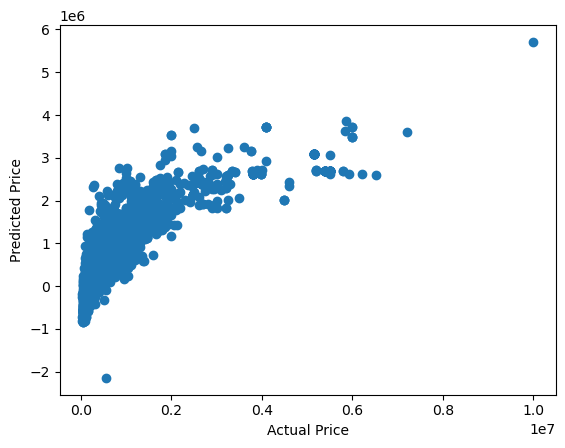

In [18]:
plt.scatter(Y_train, prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [19]:
test_data = linear_model.predict(X_test)

In [20]:
error_score = metrics.r2_score(Y_test,test_data)
print(error_score)

0.6774770008931772


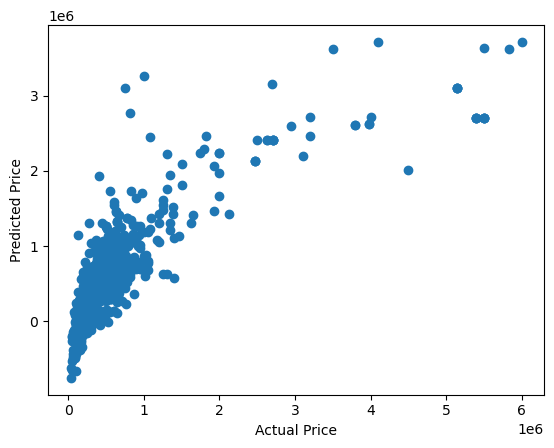

In [21]:
plt.scatter(Y_test, test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [22]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, Y_train)


y_pred = rf.predict(X_test)
r2 = metrics.r2_score(Y_test, y_pred)

In [23]:
print(r2)

0.9839825289939536


In [24]:
print("Train R2:", rf.score(X_train, Y_train))
print("Test R2:", rf.score(X_test, Y_test))

Train R2: 0.9956365253970753
Test R2: 0.9839825289939536


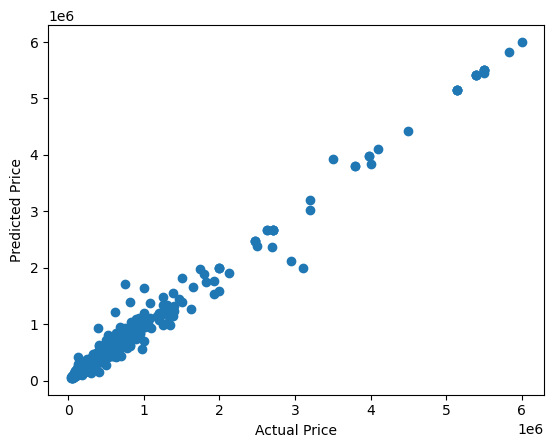

In [25]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [26]:
import pickle
with open("car_price_model.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("columns.pkl", "wb") as f:
    pickle.dump(list(X.columns), f)

        Feature  Importance
7     max_power    0.729599
9       car_age    0.196986
0     km_driven    0.020352
5       mileage    0.019011
6        engine    0.014874
2   seller_type    0.009180
1          fuel    0.003498
8         seats    0.003207
4         owner    0.001710
3  transmission    0.001583


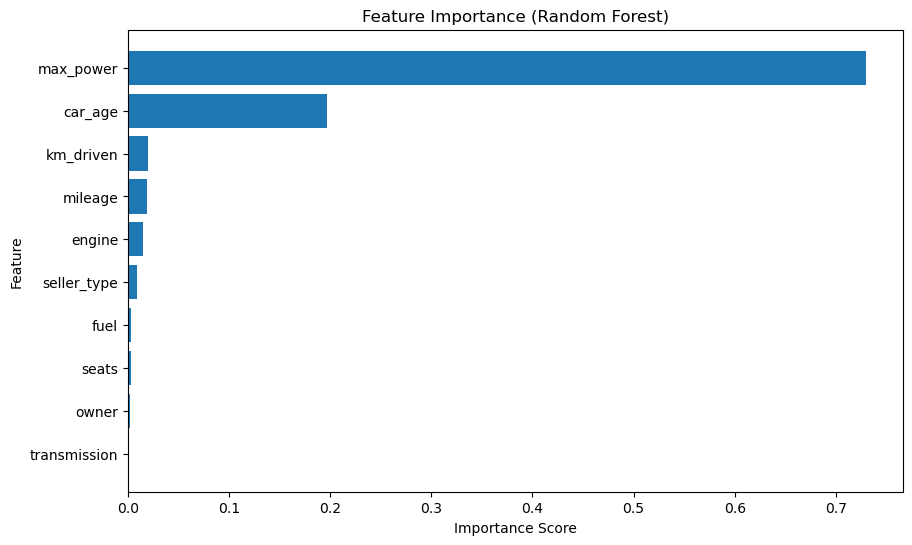

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()
